# Summer 2022 CS 59000-04I AI Software Engr & Application DIS
Welcome Students from **Group 1**

The dataset to be used at the tasks should be mounted from Google Drive for each student.

The datasets are provided as a shared Google Drive folder, if you have not received the link, please inform us.

The instructions for mount the Google Drive folder at the Google Colab and to access the data is:

https://colab.research.google.com/notebooks/io.ipynb

---

The dataset available are:


*   Job postings
*   Resumes

---

If the share "datasets" folder is not showing in Google Colab, follow these instructions to add a shortcut to your drive:

https://support.google.com/drive/answer/2375057

---

**For any follow-up questions/queries:**

*   Venkata Inukollu <inukollv@pfw.edu>
*   Leandro de Almeida <almel01@pfw.edu>

---

*Disclaimer: The provided datasets are restrict to be used only during the academic tasks*



## References:
- [Pandas Caculate Statistics/ Summary/ Columns](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Material/References:
- [Pandas - Filter row and columns](https://python.plainenglish.io/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c)
- [Pandas - Drop multiple columns](https://pythonexamples.org/pandas-dataframe-delete-column/#5)
- [Pandas - Check Pandas data type](https://datascientyst.com/check-dtype-column-columns-pandas-dataframe/#:~:text=%20How%20to%20Check%20the%20Dtype%20of%20Column,Check%20if%20column%20is%20numeric%2C%20dateti...%20More%20)
- [Data - Columns Views - Original Data](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents)
- [Pandas - Convert value in columns](https://stackoverflow.com/questions/52317459/python-pandas-convert-single-value-in-object-column)
- [Time Ranges/ Time Comparision](https://pythonawesome.com/time-ranges-with-python/)
- [Remove columns or Rows in Pandas](https://www.bing.com/search?q=remove+column+from+pandas&cvid=0b68a851c23b4a55abbb755ec28ca2f6&aqs=edge..69i57j0l7j69i64.8187j0j1&pglt=931&FORM=ANNTA1&PC=U531)
- [Remove rows with certain citeria in Python Pandas](https://stackoverflow.com/questions/42125131/delete-row-based-on-nulls-in-certain-columns-pandas)
- [AI BOOKS](http://aima.cs.berkeley.edu/)
- https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3
- https://monkeylearn.com/keyword-extraction/
- https://www.justintodata.com/use-nlp-in-python-practical-step-by-step-example/
- https://mathdatasimplified.com/
- https://www.kdnuggets.com/2019/11/content-based-recommender-using-natural-language-processing-nlp.html (7/28/2022)


In [2]:
# Data Pre-Processing - Job listing Dataset 
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json
import os
import gc # For garbage collection when deal with memory


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'/content'

## Job Data Analyst

- Goal: Top 3 Career choices, success factor (example Salaries growth, location, etc as per AI Attributes)

### Read Data:

In [5]:
# FileNames is a list with the names of the csv files contained in the 'dataset' path
def get_file_names(path):
  filenames = []
  for file in os.listdir(path):
    if file.endswith('.csv'):
      filenames.append(file)
  return filenames

# function that reads the file from the FileNames list and makes it become a dataFrame
def GetFile(fnombre, path):
  location = path + fnombre
  df = pd.read_csv(location)
  return df

file_path_job = './drive/MyDrive/datasets/jobposting/'
# combine all the data frame as one using list complehesion
dfjob = pd.concat([GetFile(file, file_path_job) for file in get_file_names(file_path_job)])

In [6]:
dfjob.shape

(300000, 22)

### Attributes Validation:

In [7]:
dfjob['salary_formatted'].value_counts()

$15 an hour                 2136
From $15 an hour            1441
$15 - $20 an hour           1273
$17 an hour                 1246
$16 an hour                 1188
                            ... 
$64,000 - $80,000 a year       1
$15.00 - $17.64 an hour        1
$40 - $75 a day                1
$3,092 - $3,762 a month        1
$32,176 - $47,316 a year       1
Name: salary_formatted, Length: 20577, dtype: int64

In [8]:
dfjob['region'].value_counts()
# Remove because there are all missing value here

EU          3510
AS          2761
SA          1863
AF           900
OC           505
Americas      54
Name: region, dtype: int64

In [9]:
dfjob['qualifications'].value_counts()
# Can't remove because need this for further basic qualification
# Convert the NAN to 'No requirement'

["US work authorization (Required)"]                                                                                                                2930
["US work authorization (Preferred)"]                                                                                                               2089
["High school or equivalent (Preferred)"]                                                                                                           2001
["Driver's License (Required)"]                                                                                                                      973
["Bachelor's (Preferred)"]                                                                                                                           960
                                                                                                                                                    ... 
["HVAC Certification (Required)","US work authorization (Required)","Secret (Requi

In [10]:
dfjob['benefits'].value_counts()

["Health insurance"]                                                                                                                                                                                                                                                                5325
["Flexible schedule"]                                                                                                                                                                                                                                                               2717
["401(k)","Dental insurance","Health insurance","Paid time off","Vision insurance"]                                                                                                                                                                                                 1873
["Paid time off"]                                                                                                                                            

In [11]:
# Remove src name
dfjob['srcname'].isnull().sum()

193418

In [12]:
dfjob['country'].value_counts()

US    300000
Name: country, dtype: int64

In [13]:
dfjob['country_code'].value_counts()

US    282417
BR       800
GB       681
CO       668
CA       612
       ...  
CF         1
BY         1
ZM         1
MD         1
UG         1
Name: country_code, Length: 166, dtype: int64

In [14]:
dfjob['company_name'].value_counts()

Deloitte                                 3804
ASSURANCE Independent Agents             1774
Amazon.com Services LLC                  1401
Aya Healthcare                           1224
Soliant                                  1075
                                         ... 
Ardent Counseling Center                    1
Mobile Management llc                       1
Duro Electric                               1
CareerStaff Unlimited - Nashville, TN       1
Sanel Corp                                  1
Name: company_name, Length: 97715, dtype: int64

In [15]:
dfjob['company_link'].value_counts()

https://www.indeed.com/cmp/The-Est%C3%A9e-Lauder-Companies-1?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54cpcg728qo000&fromjk=00009f127a9e34a7              1
https://www.indeed.com/cmp/Holistic-Healing-Collective?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t7pg6pkej800&fromjk=96522f26f3a8fcba                    1
https://www.indeed.com/cmp/United-Premier?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t62jeq072800&fromjk=96524389f8fbf9ac                                 1
https://www.indeed.com/cmp/Temp-Experts?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t5uj7t48o800&fromjk=965241afe500d938                                   1
https://www.indeed.com/cmp/Kum-&-Go?campaignid=vjcmpinfo&from=vjcmpinfo&tk=1g54t6r8lq051800&fromjk=96523fc6ef1ed652                                       1
                                                                                                                                                         ..
https://www.indeed.com/cmp/Trugreen?campaignid=vjcmpinfo&from=vj

In [16]:
dfjob.head()

,jobid,apply_link,company_link,company_name,company_rating,company_reviews_count,country,country_code,current_url,date_posted,...,description_text,domain,job_title,job_type,location,region,salary_formatted,benefits,qualifications,srcname
0,00009f127a9e34a7,https://www.indeed.com/applystart?jk=00009f127...,https://www.indeed.com/cmp/The-Est%C3%A9e-Laud...,The Estée Lauder Companies,4.0,2214.0,US,US,https://www.indeed.com/viewjob?jk=00009f127a9e...,22 days ago,...,The Treasury Analyst will assist the Treasury ...,www.indeed.com,"Analyst, Treasury – Banking Retail","[""Full-time""]",United States,NaN,NaN,NaN,NaN,NaN
1,0001783849fce183,NaN,"https://www.indeed.com/cmp/H-A-Mapes,-Inc?camp...",Harry's Convenience Stores,NaN,NaN,US,LB,https://www.indeed.com/viewjob?jk=0001783849fc...,30+ days ago,...,At Harry’s the Store Associate / Foodservice A...,www.indeed.com,Store Associate/ Food Service Associate - Saco...,"[""Part-time""]","Lebanon, ME",AS,From $14 an hour,"[""401(k)"",""401(k) matching"",""Dental insurance""...","[""High school or equivalent (Preferred)"",""US w...",NaN
2,00027f45e5373e13,https://www.indeed.com/applystart?jk=00027f45e...,https://www.indeed.com/cmp/Accenture?campaigni...,Accenture,4.0,21827.0,US,US,https://www.indeed.com/viewjob?jk=00027f45e537...,30+ days ago,...,ACCENTURE's Flexible Workforce solves clients’...,www.indeed.com,Cloud Architect,"[""Contract""]",United States,NaN,NaN,NaN,NaN,globalcxaccenture.avature.net
3,00028cda307fcffa,NaN,https://www.indeed.com/cmp/Techo--bloc?campaig...,Techo-Bloc,3.1,114.0,US,AO,https://www.indeed.com/viewjob?jk=00028cda307f...,30+ days ago,...,Company Description\n Why We Want You: Multi...,www.indeed.com,Maintenance Technician - $30+/hr Day Shift (El...,"[""Full-time""]","Angola, IN 46703",AF,From $30 an hour,"[""401(k)"",""Dental insurance"",""Disability insur...",NaN,NaN
4,000002c948819e54,https://www.indeed.com/applystart?jk=000002c94...,https://www.indeed.com/cmp/Michael-Page?campai...,Michael Page,3.5,354.0,US,AU,https://www.indeed.com/viewjob?jk=000002c94881...,30+ days ago,...,Working within the New York office the individ...,www.indeed.com,IT Senior Support Manager,NaN,"Brooklyn, NY",OC,NaN,NaN,NaN,www.michaelpage.com


### Check Missing Values and Clean Up
Truc Report:
- Data cleaning took me a total of more than 8hrs to looks for the approriate data that need to keep or drop.
- All the attributes need to make sense and support the machine learning model
- Data that consider biased will be drop
- Data that is missing need to fix and transform to meaningful data

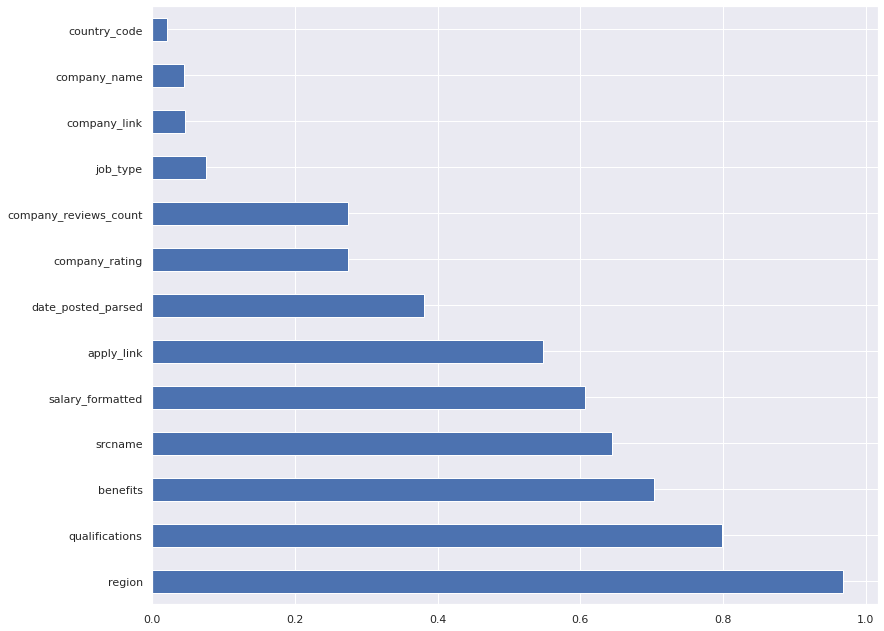

In [17]:
# Set figure size
plt.rcParams["figure.figsize"]=13,11
sns.set(style='darkgrid')

missing_percentage = dfjob.isna().sum().sort_values(ascending=False)/len(dfjob)
missing_percentage[missing_percentage!=0].plot(kind='barh')

In [18]:
list(dfjob.columns)

['jobid',
 'apply_link',
 'company_link',
 'company_name',
 'company_rating',
 'company_reviews_count',
 'country',
 'country_code',
 'current_url',
 'date_posted',
 'date_posted_parsed',
 'description',
 'description_text',
 'domain',
 'job_title',
 'job_type',
 'location',
 'region',
 'salary_formatted',
 'benefits',
 'qualifications',
 'srcname']

In [19]:
dfjob.drop(['jobid','apply_link','company_link','country','current_url','date_posted','date_posted_parsed','domain','region','srcname'],axis=1,inplace=True)

# Out put will be company name and job title
# Remove apply_link because it will not be necessary to have it (we want to analyze the sucessful candidates as well as the current one)
# Apply_link can be removed when the job is filled which is a good sign to analyze these job description (apply_link hold no value)

# Drop the row where the company name or link is blank:
dfjob.dropna(axis=0, how='all',subset=['company_name', 'job_type'], thresh=2, inplace=True) 

# Change null in qualification to no requirement
dfjob['qualifications'] = dfjob['qualifications'].fillna('["No requirement"]')

# Change null in benefits to no benefits 
dfjob['benefits'] = dfjob['benefits'].fillna('["No benefits"]')

# Assume all the mssing value in salary_formated is negotiable (50% of the dataset)
dfjob['salary_formatted'] = dfjob['salary_formatted'].fillna('Negotiable')

# Assume all the missing country is Others
dfjob['country_code']=dfjob['country_code'].fillna('Other')

# Fill in the rating with 0
dfjob['company_rating']=dfjob['company_rating'].fillna(0.0)
dfjob['company_reviews_count']=dfjob['company_reviews_count'].fillna(0.0)

In [20]:
dfjob.shape

# After clean up and drop, we have a new data set of 265633 row and 12attributes

(265633, 12)

### Extended Analyst on the company rating and company review

In [21]:
# Create norating subset that hold the company doesn't has rating
norating = dfjob.loc[dfjob['company_rating']==0]

# Validate the result
norating.head()

,company_name,company_rating,company_reviews_count,country_code,description,description_text,job_title,job_type,location,salary_formatted,benefits,qualifications
1,Harry's Convenience Stores,0.0,0.0,LB,<p>At Harry’s the Store Associate / Foodservic...,At Harry’s the Store Associate / Foodservice A...,Store Associate/ Food Service Associate - Saco...,"[""Part-time""]","Lebanon, ME",From $14 an hour,"[""401(k)"",""401(k) matching"",""Dental insurance""...","[""High school or equivalent (Preferred)"",""US w..."
6,The Michigan Theater Foundation,0.0,0.0,US,"<p>The historic Michigan Theater, located in t...","The historic Michigan Theater, located in the ...","Major Gift Officer, The Michigan Theater Found...","[""Full-time""]","Ann Arbor, MI 48104","$68,000 - $80,000 a year","[""No benefits""]","[""Bachelor's (Required)""]"
11,"Facing History and Ourselves, Inc",0.0,0.0,US,<div>\n <p><b>Position: Director of Developmen...,"Position: Director of Development, Cleveland \...","Director of Development, Cleveland","[""Full-time""]","Cleveland Heights, OH 44118",Negotiable,"[""No benefits""]","[""No requirement""]"
16,The Eye Care Institute,0.0,0.0,US,<p><b>Education and Experience: </b></p>\n<p><...,Education and Experience: Required· Ophthalmic...,Ophthalmic Technician,"[""Full-time""]","Louisville, KY 40206",$16 - $18 an hour,"[""Dental insurance"",""Health insurance"",""On-the...","[""Ophthalmology: 1 year (Required)"",""US work a..."
22,"Copper Whiskey Bar & Grill, Bozeman",0.0,0.0,US,"<p><b>Bar Manager: Copper Whiskey Bar & Grill,...","Bar Manager: Copper Whiskey Bar & Grill, Big S...","Bar Manager: Copper, Big Sky","[""Full-time""]","Tahoe Vista, CA","From $60,000 a year","[""401(k)"",""401(k) matching"",""Dental insurance""...","[""No requirement""]"


In [22]:
# Use value counts to check the name of the company
norating['company_name'].value_counts

# Turn out all the company in this section only post their job one time

<bound method IndexOpsMixin.value_counts of 1                    Harry's Convenience Stores
6               The Michigan Theater Foundation
11            Facing History and Ourselves, Inc
16                       The Eye Care Institute
22          Copper Whiskey Bar & Grill, Bozeman
                          ...                  
29981                                   SunStop
29982    Ford - Lincoln Veteran Careers Program
29988                   Acro Metal Stamping Co.
29992                          Messick and Gray
29997                                Sanel Corp
Name: company_name, Length: 66460, dtype: object>

In [23]:
# Validate if there is any rating associate with the number of user
sum(norating['company_rating']==norating['company_reviews_count'])

66460

In [24]:
# Check the shape of the dataset
norating.shape

(66460, 12)

**Result: **
- Due to all the above analyst, I can conclude the norating consist of the company who only post their job one time. So the change to promote in these company is small due to the amount of jobs posted and rating. There for I will remove the row associate with these company where the change is small and the review is none.

In [25]:
## Delete norating since we do not need it
del norating


In [26]:
# Drop the row where the company name or link is blank:
dfjob = dfjob[(dfjob.company_rating != 0) & (dfjob.company_reviews_count != 0)]

In [27]:
# [name][title][rating][count] list or string
# List of the top 50 we found

In [28]:
dfjob.head()

,company_name,company_rating,company_reviews_count,country_code,description,description_text,job_title,job_type,location,salary_formatted,benefits,qualifications
0,The Estée Lauder Companies,4.0,2214.0,US,<div>\n <p>The Treasury Analyst will assist th...,The Treasury Analyst will assist the Treasury ...,"Analyst, Treasury – Banking Retail","[""Full-time""]",United States,Negotiable,"[""No benefits""]","[""No requirement""]"
2,Accenture,4.0,21827.0,US,<div></div>\n<div>\n <div>\n <div>\n <b>ACC...,ACCENTURE's Flexible Workforce solves clients’...,Cloud Architect,"[""Contract""]",United States,Negotiable,"[""No benefits""]","[""No requirement""]"
3,Techo-Bloc,3.1,114.0,AO,<div>\n Company Description\n <p><b><br> Why W...,Company Description\n Why We Want You: Multi...,Maintenance Technician - $30+/hr Day Shift (El...,"[""Full-time""]","Angola, IN 46703",From $30 an hour,"[""401(k)"",""Dental insurance"",""Disability insur...","[""No requirement""]"
7,McMahon Associates,3.8,8.0,US,<div>\n <p><b>POSITION SUMMARY:</b></p> \n <p>...,POSITION SUMMARY: \n The Senior Project Engine...,Senior Project Engineer (Transportation - Design),"[""Full-time""]","Camp Hill, PA 17011",Negotiable,"[""No benefits""]","[""No requirement""]"
8,Amazon Kuiper Manufacturing,3.5,82832.0,US,<div>\n <ul>\n <li>BS degree or higher in Ele...,BS degree or higher in Electrical or Computer ...,Design Verification Manager,"[""Full-time""]","Austin, TX",Negotiable,"[""No benefits""]","[""No requirement""]"


In [29]:
dfjob.shape

(199173, 12)

In [30]:
# Open text file resume
file1 = open('./drive/MyDrive/resume.txt', 'r')
resume_data = []  

while True:
    # Get next line from file
    line = file1.readline()
    resume_data.append(line)

    # if line is empty or end of file is reached
    if not line:
        break
    
file1.close()

In [ ]:
resume_data

In [31]:
# Clean up the resume
import re

# Clean up address, school, name, number, take only character in to the new string list
for i in range(0,len(resume_data)):
    resume_data[i] = re.sub(r'\[.*?\]', '', resume_data[i])
    word1 = " ".join(re.findall("[a-zA-Z]+", resume_data[i]))
    resume_data[i] = word1

# Using the keywords dictionary to hold all the keyword
keyword_dict = []

for line in resume_data:
    li = list(line.split(" "))
    for string_ in li:
        keyword_dict.append(string_.lower()) # Convert the string to lower

# Character that does not necessary to the search can be removed
remove_characters = ['','a','truc','huynh','through','self','classroom','ide','concepts','founder','manager','online','first','second','are','was','unsatisfied',
                     'an','to','on','and','that','this','the','by','in','with','s','of','non','co','my','your','his','her','they','their','he','she','it','under',
                     'may','guided','submit','vietnam','cis','any','unsatisfied','services','for','watercraft','specialist','us','recomendation','years','work','team',
                     'customer','ensure','supply','work','year','plans','customer','developing','records','technologies','computer','monitoring','building','market',
                     'ensures','supply','options','learn','master','recommendation','science','risk','strategize','experienced','create','tracking','stock','students',
                     'previous','concerns','structures','budget','next','methods','stakeholders','define','making','profits','achievement','address','routine','installed',
                     'visual','higher','coming','teaching','letters','chain','content','trading','cross','headquarters','audiences','increase','warehouse','loss','car',
                     'advice','highly','shows','toward','commander','compare','fiscal','directly','instructor','reduced','working','project','monitor','learning',
                     'ethical','teach','trade']

soft_skill_remove = ["structure", "experience", "requirements", "worked", "years", "others", "skills", "communication", "ability", "application", "program", "customers",
                     "company", "information", "plan", "knowledge", "benefit", "process", "training", "developed", "assistant", "support", "schedules", "education", 
                     "provided", "business", "operation", "systems", "oriented", "level", "base", "strong", "procedures", "organization", "functional", "practices", 
                     "reports", "office", "people", "certificate", "pay", "industries", "accountable", "staff", "associate", "full", "equipment", "technology", 
                     "maintaining", "design", "record", "clients", "bachelor", "projects", "issues", "using", "relationship", "internal", "technical", "collaborative", 
                     "meet", "implementation", "sales", "background", "detail", "preparing", "lead", "build", "coordination", "monitored", "different", "software", 
                     "marketing", "result", "weeks", "testing", "financial", "security", "proficient", "ensure", "decision", "improve", "engineer", "efficiency", 
                     "driving", "first", "futures", "instruction", "contracts", "strategies", "conducted", "attention", "identified", "analytics", "evaluated"]

for char in remove_characters:
    while(char in keyword_dict) :
        keyword_dict.remove(char)

for char in soft_skill_remove:
    while(char in keyword_dict) :
        keyword_dict.remove(char)

# remove the repeated word in the dictionary
keyword_dict = list(dict.fromkeys(keyword_dict))

# Figure out the length of the keyword dictionaries
len(keyword_dict)

102

In [32]:
def pretty_print(word_list):
  index = 1
  for word in word_list:
    print(word, end=', ')
    if index % 10 == 0:
      print('')
    index += 1

In [33]:
# Display list of dictionary
pretty_print(keyword_dict)

stack, developer, management, analyzing, data, scientist, machine, cyber, introduce, python, 
react, git, docker, web, development, ms, visio, jira, github, slack, 
html, css, json, bootstrap, r, shiny, server, framework, flask, restful, 
api, javascript, heroku, paas, lifecycle, agile, methodologies, visualization, dashboard, bi, 
mining, ml, ai, database, sql, mysql, algorithms, c, java, spring, 
mvc, net, eclipse, studio, vs, code, anaconda, pycharm, jupiter, notebook, 
servlet, apache, tomcat, automation, bot, script, hacking, ui, ux, explaining, 
multitask, virtual, machines, windows, linux, mac, osx, autocad, d, modelling, 
inventory, planning, forecasting, optimization, logistics, teams, prototype, predict, volatility, analyst, 
infrastructure, social, media, compared, logistic, vso, army, medals, vessel, lab, 
coding, research, 

## Model 1: Nature Language Processing (NLP) with Parts of Speech (POS) tokenization for Keyword Filtering:
Approach will be:
- Sampling
- POS Token
### 1) Sampling

The amount of words is too large, I will reduce the data to 10,000 row so that we can see how our model works on the smaller scale (sample is 5% of the data)

In [34]:
sample_size=10000

# Create a sample of 10,000 rows
dfjob_s_1 = dfjob.sample(n=sample_size)

# Validate the transactions
dfjob_s_1.head()

,company_name,company_rating,company_reviews_count,country_code,description,description_text,job_title,job_type,location,salary_formatted,benefits,qualifications
20264,Wells Fargo,3.7,42353.0,US,"<div>\n At Wells Fargo, we are looking for tal...","At Wells Fargo, we are looking for talented pe...",Senior Financial Risk Specialist,"[""Full-time""]","Charlotte, NC",Negotiable,"[""No benefits""]","[""No requirement""]"
23837,Jacobs,3.9,5101.0,Other,<div>\n <p>Challenging Today. Reinventing Tomo...,Challenging Today. Reinventing Tomorrow. \n W...,Systems Administrator,"[""Full-time""]","Chantilly, VA 20153",Negotiable,"[""No benefits""]","[""No requirement""]"
20597,BJ's Restaurant and Brewhouse,3.5,2578.0,US,<p></p>\n<div>\n <p>Open interviews conducted ...,Open interviews conducted daily - Walk-ins Wel...,Prep Cook,"[""Full-time"",""Part-time""]","Tulsa, OK 74133",$15 an hour,"[""401(k)"",""Dental insurance"",""Health insurance...","[""No requirement""]"
21737,"Blue Cross Blue Shield of IL, MT, NM, OK & TX",3.9,1676.0,US,<p></p>\n<div>\n <div>\n <p><b>Position Summa...,Position Summary: This position in Finance is ...,Internal Ops Budg/Fin Consultant,"[""Full-time""]","Chicago, IL",Negotiable,"[""No benefits""]","[""No requirement""]"
5432,Ingredion,3.7,416.0,US,<div>\n <div>\n TITLE: Technical Lead\n </div...,TITLE: Technical Lead\n LOCATION: Cedar Ra...,Technical Lead,"[""Full-time""]","Cedar Rapids, IA 52404",Negotiable,"[""No benefits""]","[""No requirement""]"


In [35]:
# Has to import NLTK and download averaged_perceptron_tagger
import nltk
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
tags = pos_tag(keyword_dict)

tags_list = []
for tag in tags:
  tags_list.append(tag[1])

tags_list = list(dict.fromkeys(tags_list))

# Figure out the length of the keyword dictionaries
len(tags_list)

8

In [37]:
tags

[('stack', 'NN'),
 ('developer', 'NN'),
 ('management', 'NN'),
 ('analyzing', 'VBG'),
 ('data', 'NNS'),
 ('scientist', 'NN'),
 ('machine', 'NN'),
 ('cyber', 'NN'),
 ('introduce', 'NN'),
 ('python', 'NN'),
 ('react', 'NN'),
 ('git', 'JJ'),
 ('docker', 'NN'),
 ('web', 'NN'),
 ('development', 'NN'),
 ('ms', 'NN'),
 ('visio', 'NN'),
 ('jira', 'NN'),
 ('github', 'NN'),
 ('slack', 'NN'),
 ('html', 'NN'),
 ('css', 'NN'),
 ('json', 'NN'),
 ('bootstrap', 'NN'),
 ('r', 'NN'),
 ('shiny', 'JJ'),
 ('server', 'NN'),
 ('framework', 'NN'),
 ('flask', 'NN'),
 ('restful', 'JJ'),
 ('api', 'JJ'),
 ('javascript', 'NN'),
 ('heroku', 'NN'),
 ('paas', 'NN'),
 ('lifecycle', 'NN'),
 ('agile', 'IN'),
 ('methodologies', 'NNS'),
 ('visualization', 'VBP'),
 ('dashboard', 'RB'),
 ('bi', 'IN'),
 ('mining', 'VBG'),
 ('ml', 'NN'),
 ('ai', 'JJ'),
 ('database', 'NN'),
 ('sql', 'NN'),
 ('mysql', 'NN'),
 ('algorithms', 'IN'),
 ('c', 'JJ'),
 ('java', 'NN'),
 ('spring', 'NN'),
 ('mvc', 'JJ'),
 ('net', 'JJ'),
 ('eclipse', 'NN

### Apply POS tagging

In [ ]:
ps = PorterStemmer()


# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)


dfjob_s_1['job_description_word_set'] = dfjob_s_1['description_text'].map(prepare_job_desc)

# process the keywords
tool_keywords_set = set([ps.stem(tok) for tok in keyword_dict]) # stem the keywords (since the job description is also stemmed.)
tool_keywords_dict = {ps.stem(tok):tok for tok in keyword_dict} # use this dictionary to revert the stemmed words back to the original.

In [ ]:
tool_keywords_dict

In [ ]:
pretty_print(tool_keywords_set)

In [ ]:
tool_list = []

msk = dfjob_s_1['country_code'] != '' # just in case you want to filter the data.

num_postings = len(dfjob_s_1[msk].index)
for i in range(num_postings):
    job_desc = dfjob_s_1[msk].iloc[i]['description_text'].lower()
    job_desc_set = dfjob_s_1[msk].iloc[i]['job_description_word_set']
    
    # check if the keywords are in the job description. Look for exact match by token.
    tool_words = tool_keywords_set.intersection(job_desc_set)
    
    # label the job descriptions without any tool keywords.
    if len(tool_words) == 0:
        tool_list.append('nothing specified')
    
    tool_list += list(tool_words)

In [ ]:
# create the list of tools.
df_tool = pd.DataFrame(data={'cnt': tool_list})
df_tool = df_tool.replace(tool_keywords_dict)

df_tool_top = df_tool['cnt'].value_counts().reset_index().rename(columns={'index': 'tool'}).iloc[:60]


In [ ]:
df_tool_top

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# visualize the tools.
layout = dict(
    title='Top Skill base on Resume',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_tool_top['tool'],
    y=df_tool_top['cnt']/num_postings
))

iplot(fig)

In [ ]:

import plotly.express as px

fig = px.bar( x=df_tool_top['tool'],
    y=df_tool_top['cnt'])
fig.show()

### Find most align 
Using the list just found and find the most 

In [ ]:
pretty_print(df_tool_top['tool'])

In [ ]:
df_tool_top['grow_percentage'] = df_tool_top['cnt']/sample_size

In [ ]:
keyword_list_after_clean = list(df_tool_top['tool'])

In [ ]:
pretty_print(keyword_list_after_clean)

**Result:**

According to the key word list and the percentage, we can extract many information such as:
  - Softskill: teams, management, planning, development
  - Hardskill: data, modelling, research, inventory, social, coding, analyzing, machines, optimization, database, visualization, methodologies, automation, virtual, infrastructure, media, lab, web, framework, script, agile, forecasting, server, logistic, lifecycle
  - Pogramming languages: Python, r, spring, javascript, scientist, compared, studio, linux, dashboard, bi, jira, prototype, algorithms, ai, react, net, cyber, explaining, visio

These are the soft skill, hard skill and programming langages are most in demand. 

## Model 2: Bags of Words and Cosine Similarity

In [ ]:
sample_size=10000

# Create a sample of 10000 rows
dfjob_s_2 = dfjob.sample(n=sample_size)

# Validate the transactions
dfjob_s_2.head()

In [ ]:
# drop for SVM, Bag of words and cosine similarity
dfjob_s_2.drop(['country_code', 'description', 'job_type', 'salary_formatted', 'benefits'],axis=1,inplace=True)

In [ ]:
dfjob_s_2.describe(include='all').T

In [ ]:
ps = PorterStemmer()

# process the job description.
def prepare_job_desc(desc):
    # tokenize description.
    tokens = word_tokenize(desc)
        
    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = [tok for tok, tag in token_tag if tag in include_tags]
    
    # stem words.
    stemmed_tokens = [ps.stem(tok).lower() for tok in filtered_tokens]
    return set(stemmed_tokens)

dfjob_s_2['keywords'] = dfjob_s_2['description_text'].map(prepare_job_desc)

In [ ]:
# Convert the data to list
dfjob_s_2['keywords'] = dfjob_s_2['keywords'].apply(list)

# Drop the unecessary_columns
dfjob_s_2.drop(['description_text'], axis=1, inplace=True)

# Merge the first 5 columns to create the company portfolio
dfjob_s_2['jobs_all_information'] = dfjob_s_2[dfjob_s_2.columns[0:4]].apply(
    lambda x: '|'.join(x.dropna().astype(str)),
    axis=1)

# remove unecessary attributes
dfjob_s_2.drop(['company_name', 'company_rating', 'company_reviews_count', 'job_title', 'location'], axis=1, inplace=True)

# Now merge the bag of words together
dfjob_s_2['bag_of_words'] = dfjob_s_2[dfjob_s_2.columns[1:2]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

# Drop the unecessary columns
dfjob_s_2.drop(['qualifications','keywords'], axis=1, inplace=True)

# convert to string
dfjob_s_2['bag_of_words'] = dfjob_s_2['bag_of_words'].apply(str)

# filter out unecessary element
dfjob_s_2['bag_of_words'] = dfjob_s_2['bag_of_words'].apply(lambda x: x.replace("'",''))
dfjob_s_2['bag_of_words'] = dfjob_s_2['bag_of_words'].apply(lambda x: x.replace(",",''))

# reset index
dfjob_s_2 = dfjob_s_2.reset_index(drop=True)

In [ ]:
dfjob_s_2.head()

In [ ]:
# Only run 1 to add the value to the 
# Create the whole string keyword
keyword_dict_str = ' '.join([str(elem) for elem in keyword_dict])

# Add to the end of the resume
dfjob_s_2.loc[len(dfjob_s_2.index)] = ['new_candidates_resume',keyword_dict_str]

In [ ]:
# drop if the data is not match
# dfjob_s_2 = dfjob_s_2. drop (index=[1000, 1001, 1002, 1003])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Transform the 
count = CountVectorizer()
count_matrix = count.fit_transform(dfjob_s_2['bag_of_words'])

# Create the matrix to compare
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# create a Series of job titles, so that the series index can match the row and column index of the similarity matrix.
indices = pd.Series(dfjob_s_2['jobs_all_information'])

# Validate similarity matrix
print(cosine_sim)

[[1.         0.17413824 0.22791836 ... 0.19094357 0.21823948 0.00736929]
 [0.17413824 1.         0.14901977 ... 0.15875666 0.11958351 0.01704924]
 [0.22791836 0.14901977 1.         ... 0.19246755 0.19054021 0.00679142]
 ...
 [0.19094357 0.15875666 0.19246755 ... 1.         0.17847433 0.00817888]
 [0.21823948 0.11958351 0.19054021 ... 0.17847433 1.         0.04723238]
 [0.00736929 0.01704924 0.00679142 ... 0.00817888 0.04723238 1.        ]]


In [ ]:
def recommend(resume_title, cosine_sim = cosine_sim):
    recommended_jobs = []

    idx = indices[indices == resume_title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended_jobs.append(list(dfjob_s_2['jobs_all_information'])[i])
        
    return recommended_jobs

In [ ]:
recommend('new_candidates_resume', cosine_sim = cosine_sim)

['CACI|3.8|2086.0|Sr. Software Engineer',
 'Cella|3.4|16.0|SENIOR REACT FRONT END DEVELOPER',
 'Deloitte|4.0|10699.0|Java Developer Senior Consultant',
 'MATRIX Resources|4.0|94.0|Java Developer',
 'Humanity|4.2|36.0|Sr. Web Developer - Media',
 'Capgemini|3.8|8685.0|Senior Java Developer',
 'Intermex Wire Transfer|3.5|46.0|Lead Software Engineer',
 'Chenega Corporation|3.6|669.0|Software Developer – JavaScript',
 'Wipro Limited|3.8|15348.0|Sales Engineer',
 'Tesla|3.4|5148.0|Software QA Engineer – Vision Automation (Reno)']

## Support Functions

In [ ]:
# Garage collections
gc.collect()